In [ ]:
 import yfinance as yf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-05-15  46.567501  47.937500  46.505001  47.730000  46.064091  106178800   
2019-05-16  47.477501  48.117500  47.209999  47.520000  45.861412  132125600   
2019-05-17  46.732498  47.724998  46.689999  47.250000  45.600845  131516400   
2019-05-20  45.880001  46.087502  45.070000  45.772499  44.174908  154449200   
2019-05-21  46.305000  47.000000  46.174999  46.650002  45.021790  113459200   
2019-05-22  46.165001  46.427502  45.637501  45.695000  44.100121  118994400   
2019-05-23  44.950001  45.134998  44.452499  44.915001  43.347343  146118800   
2019-05-24  45.049999  45.535000  44.654999  44.742500  43.180859   94858800   
2019-05-28  44.730000  45.147499  44.477501  44.557499  43.002323  111792800   
2019-05-29  44.105000  44.837502  44.000000  44.345001  42.797234  113924800   

           company_name  
Date                     
2019-05-15        APPLE  
2019-05-16        APPLE  
2019-05-17        APPLE  
2019-05-20        APPLE  
2019-05-21        APPLE  
2019-05-22        APPLE  
2019-05-23        APPLE  
2019-05-24        APPLE  
2019-05-28        APPLE  
2019-05-29        APPLE

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to convert company_name to numerical labels
df['company_factor'] = label_encoder.fit_transform(df['company_name'])

# Print the mapping of original company names to numerical labels
print("Mapping of Company Names to Numerical Labels:")
for company, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(company, ":", label)


Mapping of Company Names to Numerical Labels:
AMAZON : 0
APPLE : 1
GOOGLE : 2
MICROSOFT : 3


In [ ]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  5036.000000  5036.000000  5036.000000  5036.000000  5036.000000   
mean    157.473470   159.208588   155.752363   157.538069   155.990527   
std      76.725851    77.324995    76.027587    76.711533    75.796840   
min      43.860001    44.480000    42.567501    43.325001    41.812824   
25%     104.695377   106.371248   103.543497   105.120003   105.009998   
50%     142.310005   144.065002   140.580002   142.465996   141.342957   
75%     177.411503   179.442493   175.987495   177.775002   176.472038   
max     429.829987   430.820007   427.160004   429.369995   429.369995   

             Volume  company_factor  
count  5.036000e+03     5036.000000  
mean   5.662375e+07        1.500000  
std    4.325936e+07        1.118145  
min    6.936000e+06        0.000000  
25%    2.565188e+07        0.750000  
50%    4.471965e+07        1.500000  
75%    7.371210e+07        2.250000  
max    4.265100e+08        3.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2019-05-15 to 2024-05-14
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            5036 non-null   float64
 1   High            5036 non-null   float64
 2   Low             5036 non-null   float64
 3   Close           5036 non-null   float64
 4   Adj Close       5036 non-null   float64
 5   Volume          5036 non-null   int64  
 6   company_name    5036 non-null   object 
 7   company_factor  5036 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 354.1+ KB


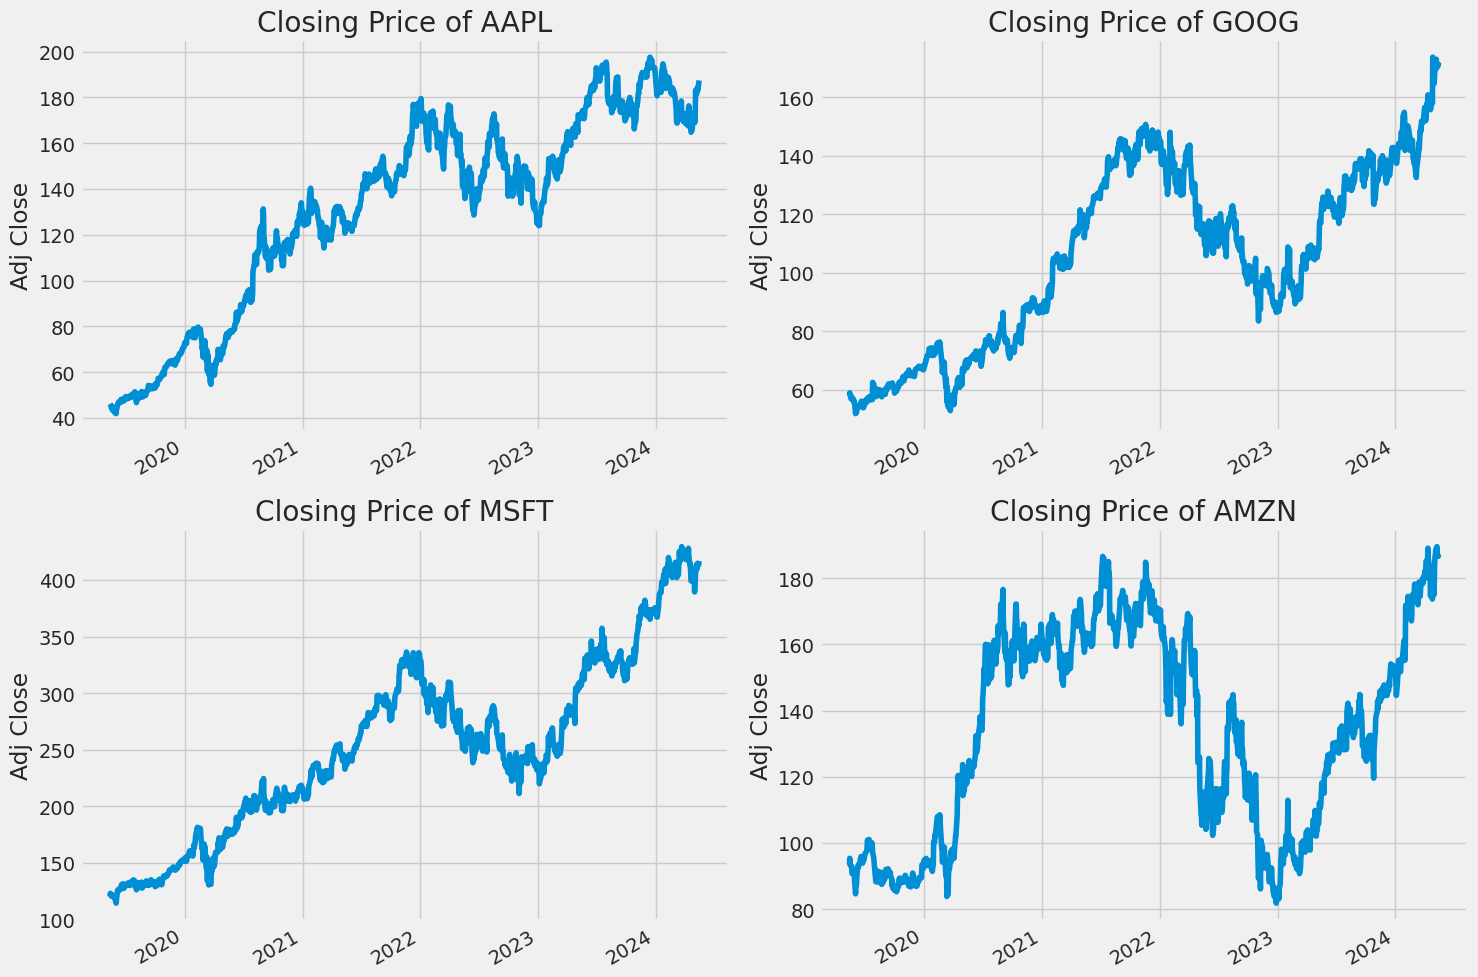

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

In [ ]:
# Create subsets for each company
company_subsets = {}
for company_name, company_data in df.groupby('company_name'):
    company_subsets[company_name] = company_data

# Print the first few rows of each subset for verification
for company_name, subset in company_subsets.items():
    print(f"Subset for {company_name}:")
    print(subset.head())


Subset for AMAZON:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-05-15  91.397499  93.721497  91.150002  93.557503  93.557503  93852000   
2019-05-16  94.296997  95.875504  94.114502  95.378502  95.378502  94156000   
2019-05-17  94.652496  95.526497  93.366501  93.449997  93.449997  94732000   
2019-05-20  92.634499  93.389000  91.777000  92.948502  92.948502  75964000   
2019-05-21  93.739502  93.949997  92.300003  92.875999  92.875999  80102000   

           company_name  company_factor  
Date                                     
2019-05-15       AMAZON               0  
2019-05-16       AMAZON               0  
2019-05-17       AMAZON               0  
2019-05-20       AMAZON               0  
2019-05-21       AMAZON               0  
Subset for APPLE:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                               

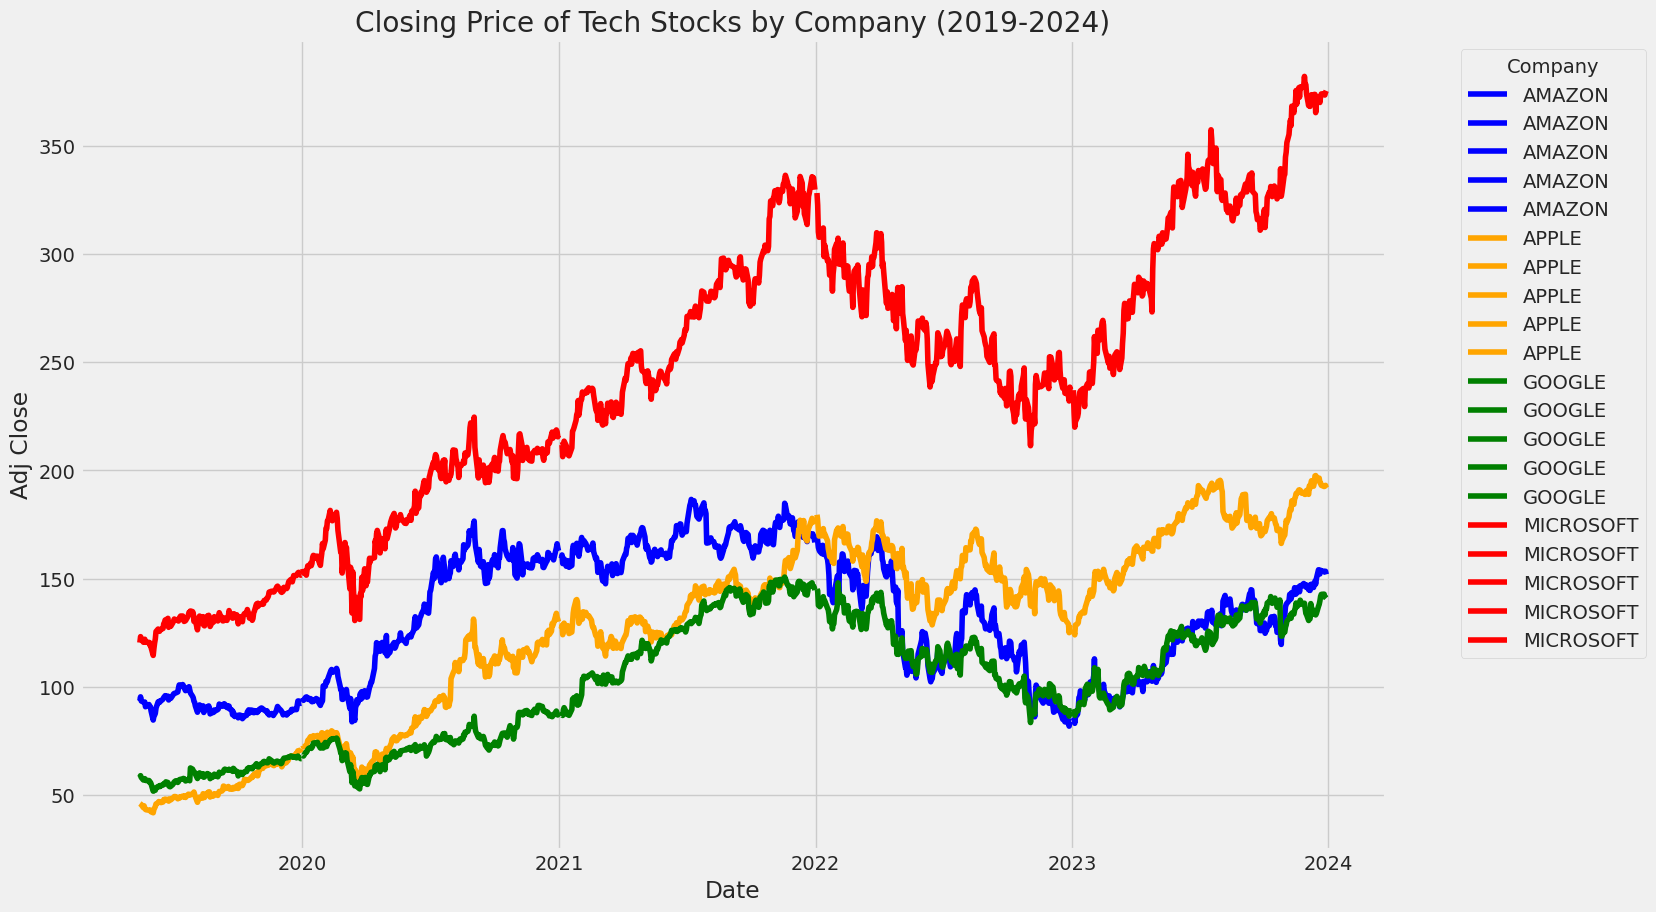

In [ ]:
# Create a line plot for each company subset in different years
plt.figure(figsize=(15, 10))

# Define colors for each company
colors = ['blue', 'orange', 'green', 'red']

# Plot closing prices for each company subset
for i, (company_name, subset) in enumerate(company_subsets.items()):
    color = colors[i % len(colors)]  # cycle through colors if more companies than colors
    for year in range(2019, 2024):  # Include data up to December 2023
        if year < 2023:
            year_data = subset[(subset.index >= f"{year}-01-01") & (subset.index <= f"{year}-12-31")]
        else:  # Include data for the entire year 2023
            year_data = subset[subset.index.year == 2023]
        plt.plot(year_data.index, year_data['Adj Close'], label=company_name, color=color)

plt.title('Closing Price of Tech Stocks by Company (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


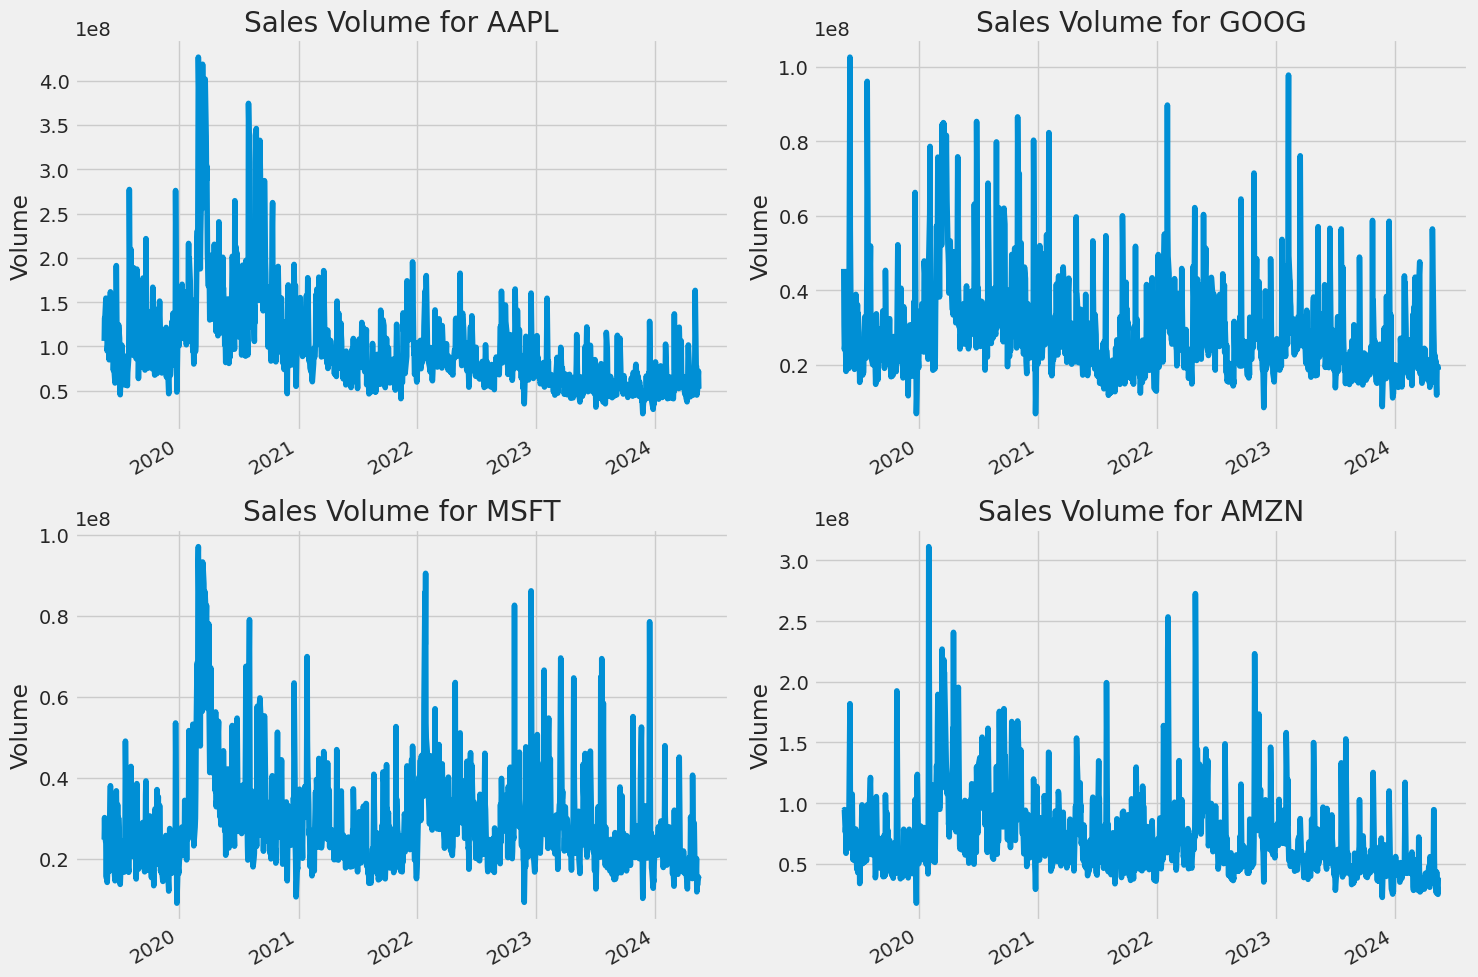

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

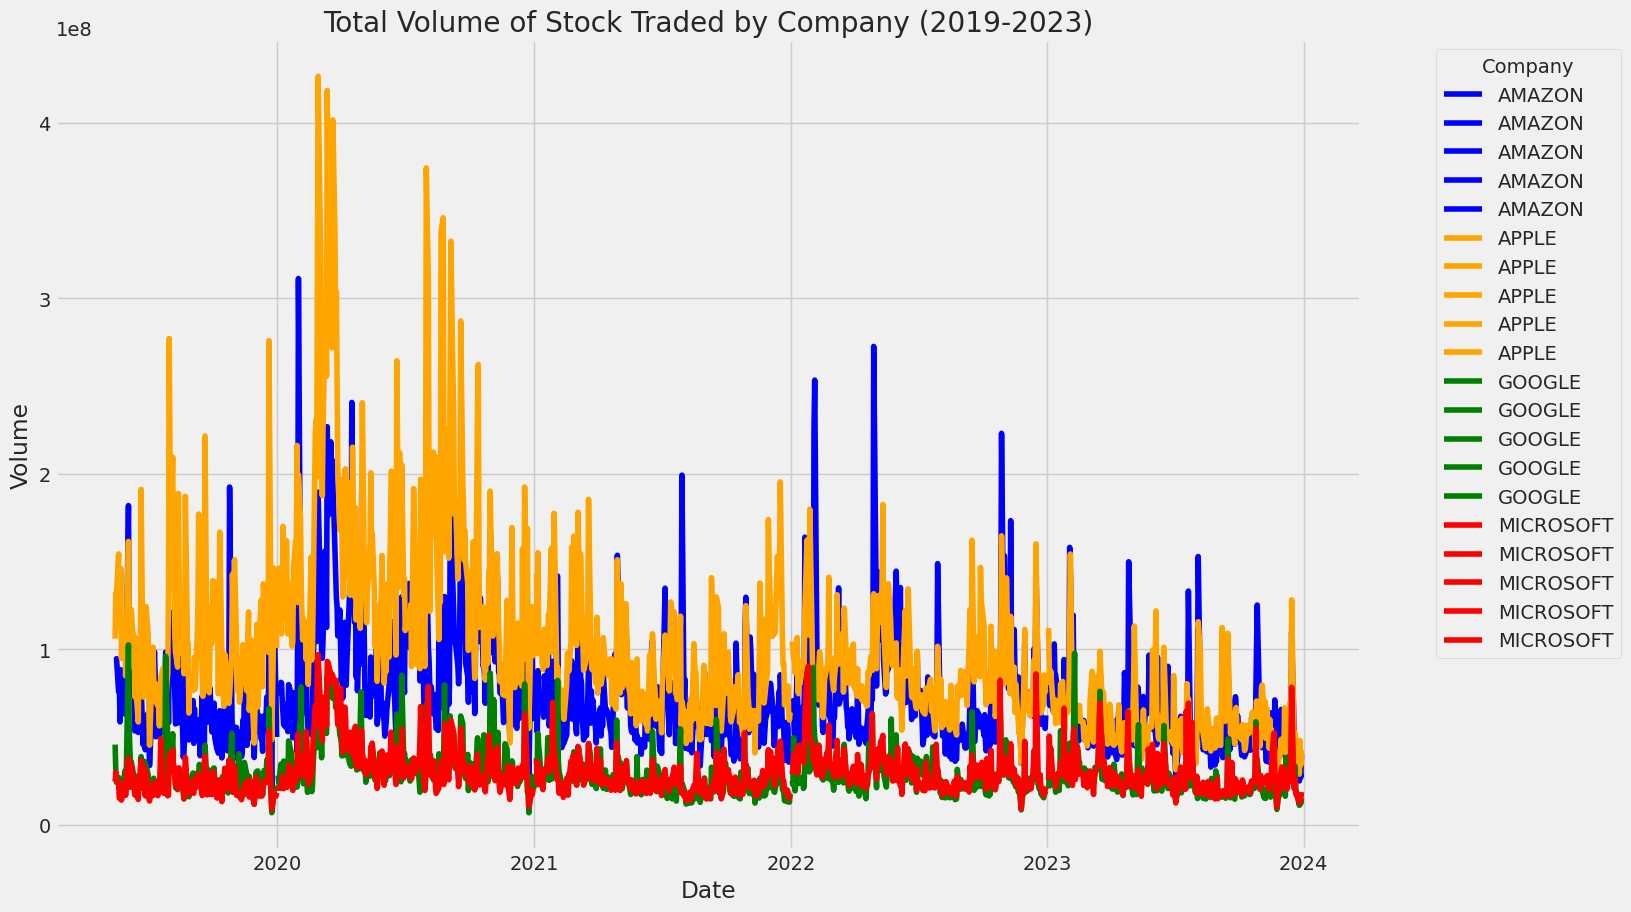

In [ ]:
# Create a line plot for the total volume of stock traded for each company, grouped by year
plt.figure(figsize=(15, 10))

# Define colors for each company
colors = ['blue', 'orange', 'green', 'red']

# Plot total volume for each company subset
for i, (company_name, subset) in enumerate(company_subsets.items()):
    color = colors[i % len(colors)]  # cycle through colors if more companies than colors
    for year in range(2019, 2024):  # Include data up to December 2023
        if year < 2023:
            year_data = subset[(subset.index >= f"{year}-01-01") & (subset.index <= f"{year}-12-31")]
        else:  # Include data for the entire year 2023
            year_data = subset[subset.index.year == 2023]
        plt.plot(year_data.index, year_data['Volume'], label=company_name, color=color)

plt.title('Total Volume of Stock Traded by Company (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


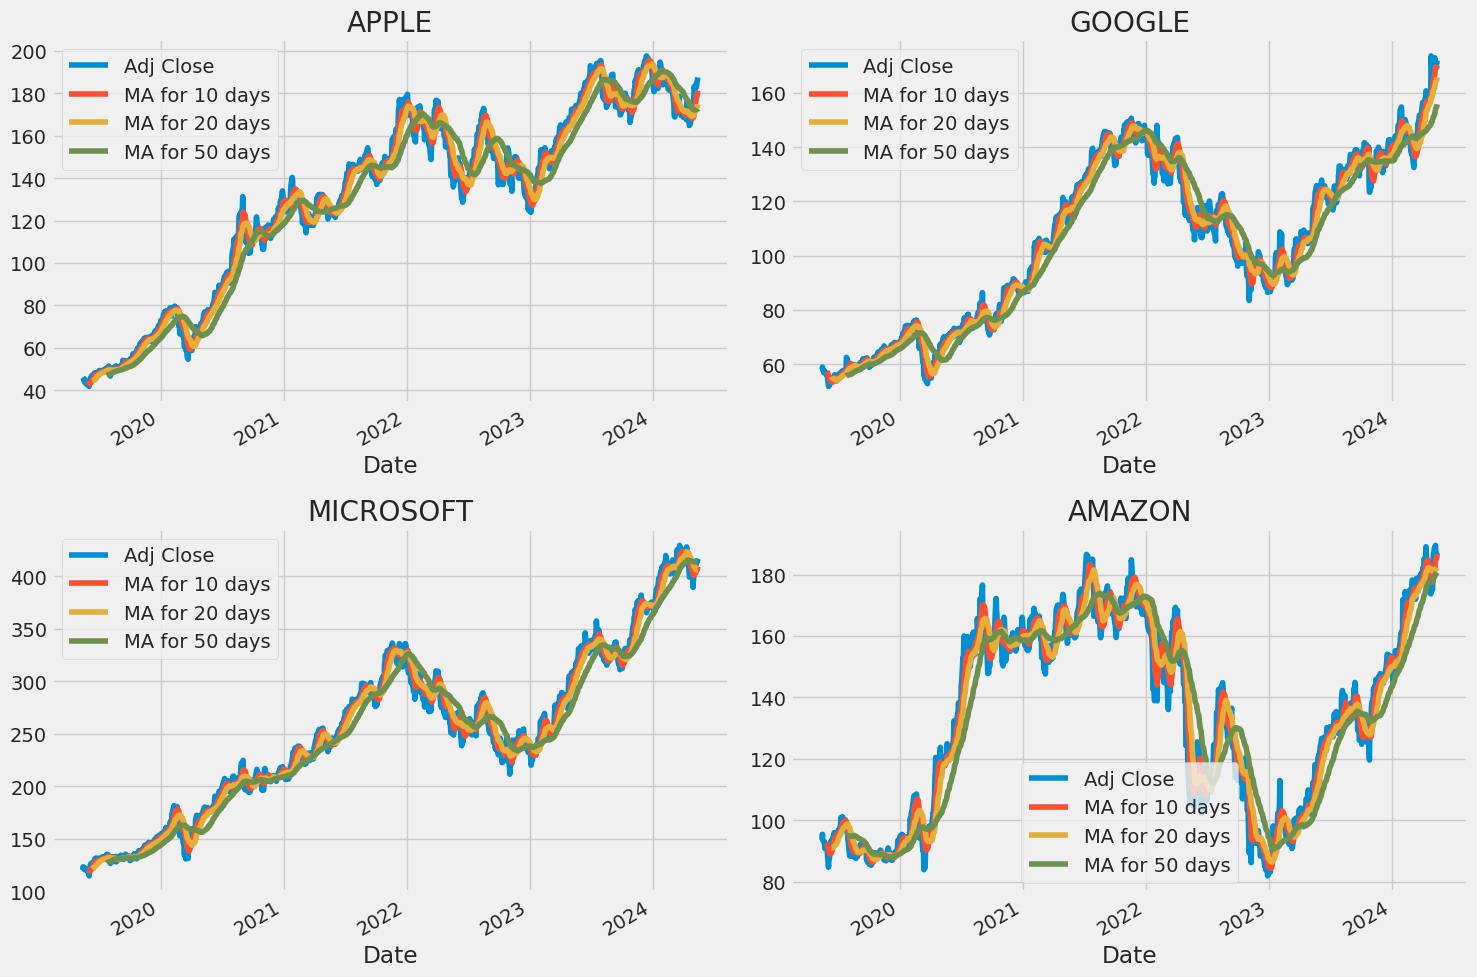

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

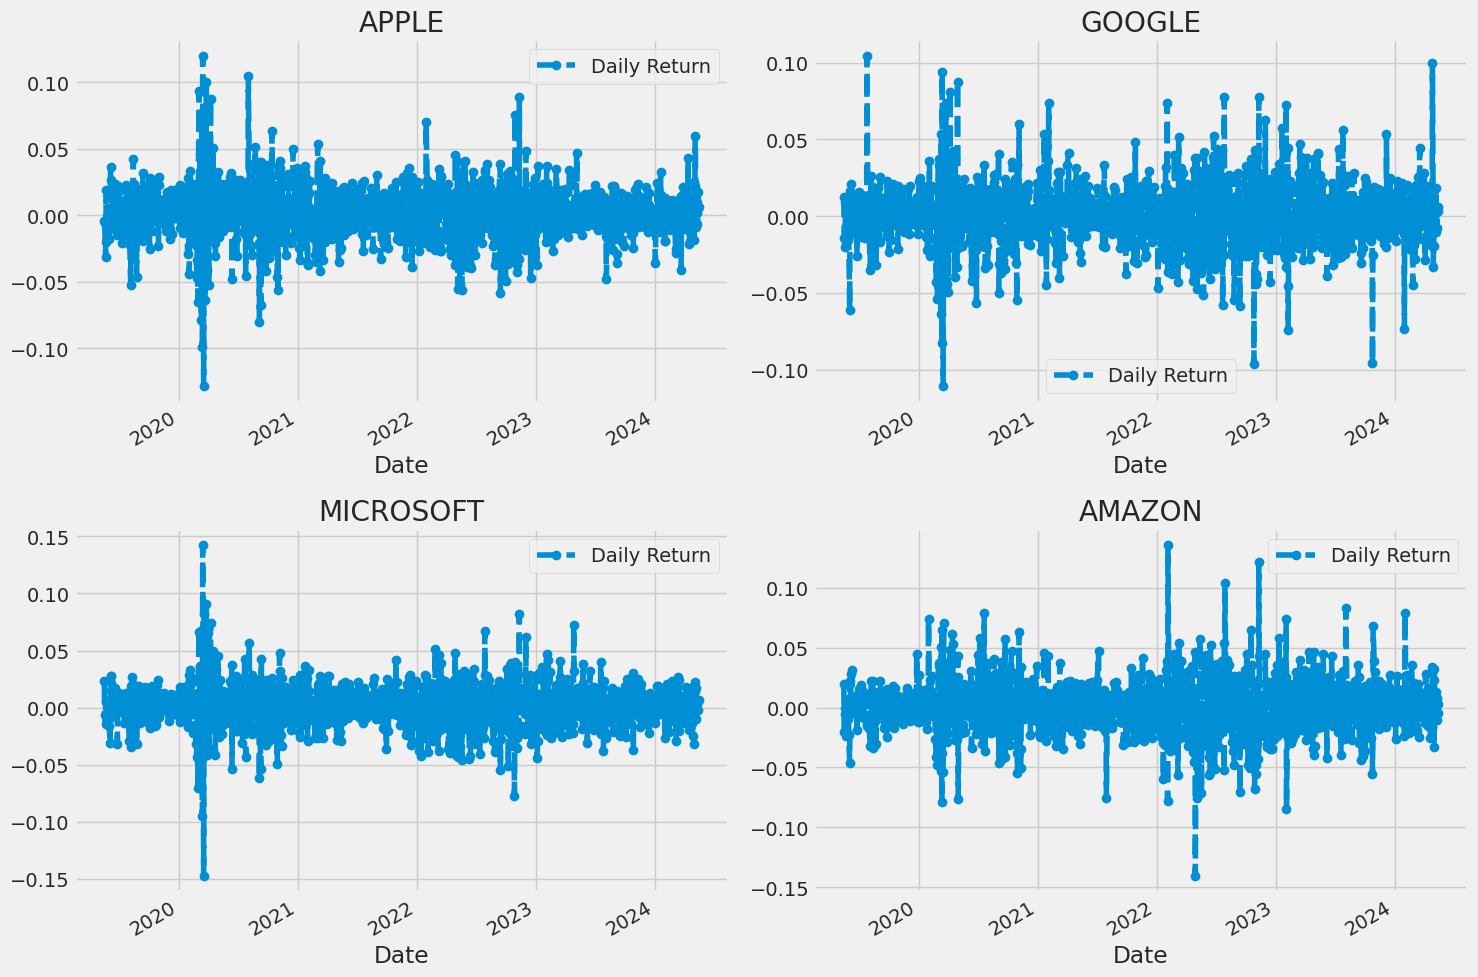

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

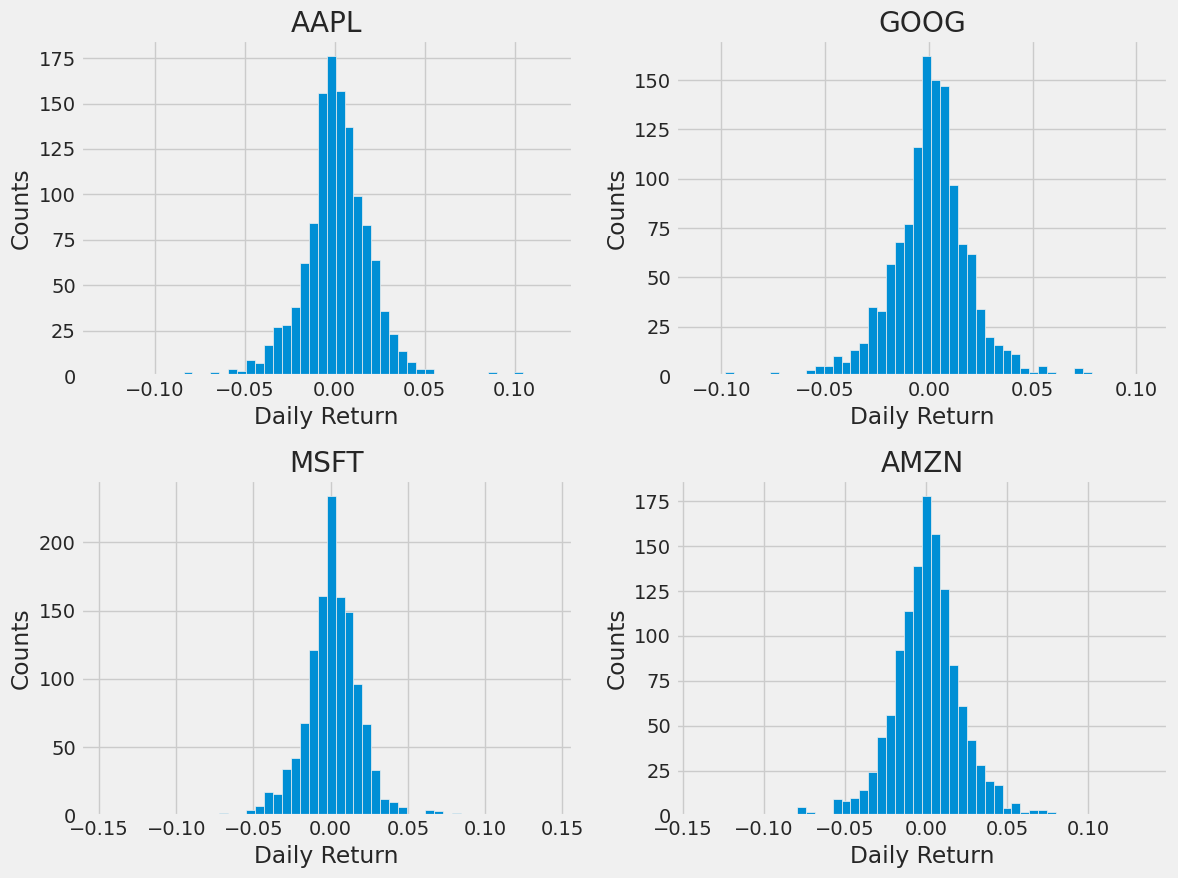

In [ ]:

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2019-05-15       NaN       NaN       NaN       NaN
2019-05-16 -0.004400  0.019464  0.012687  0.023092
2019-05-17 -0.005682 -0.020219 -0.014148 -0.006670
2019-05-20 -0.031270 -0.005366 -0.020176 -0.014445
2019-05-21  0.019171 -0.000780  0.009466  0.005387

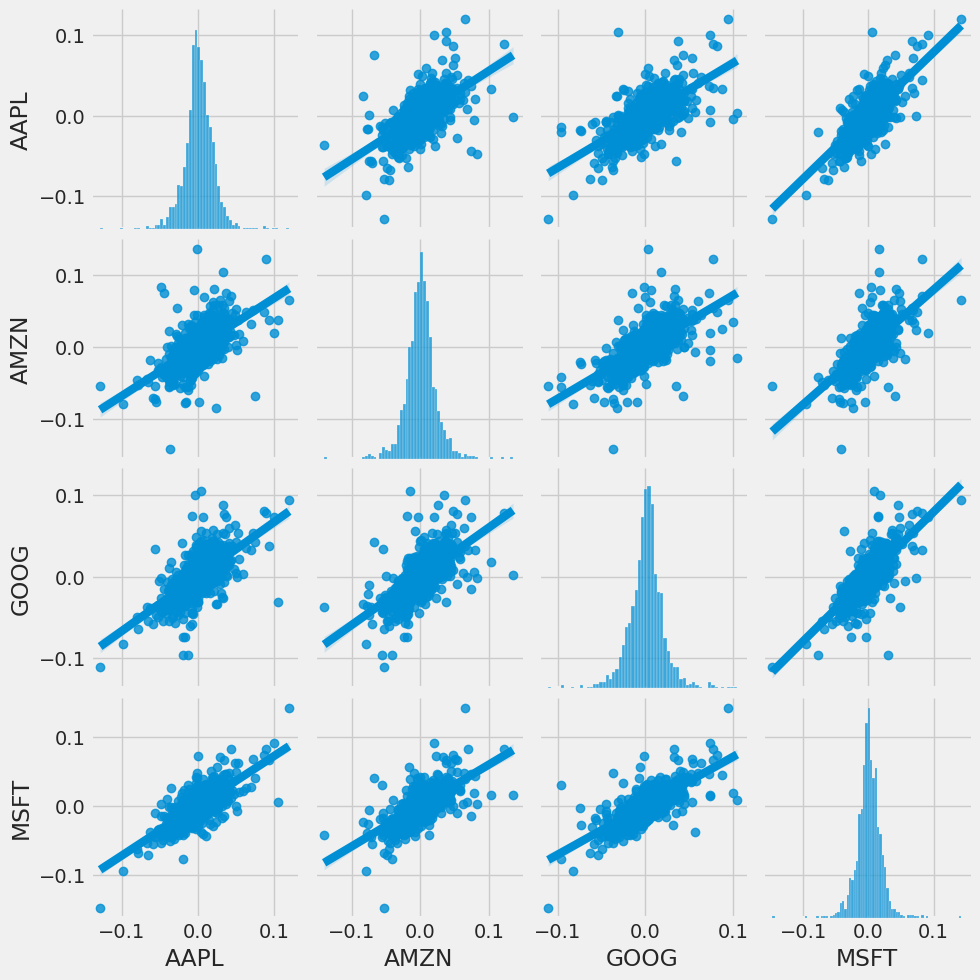

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons
sns.pairplot(tech_rets, kind='reg')

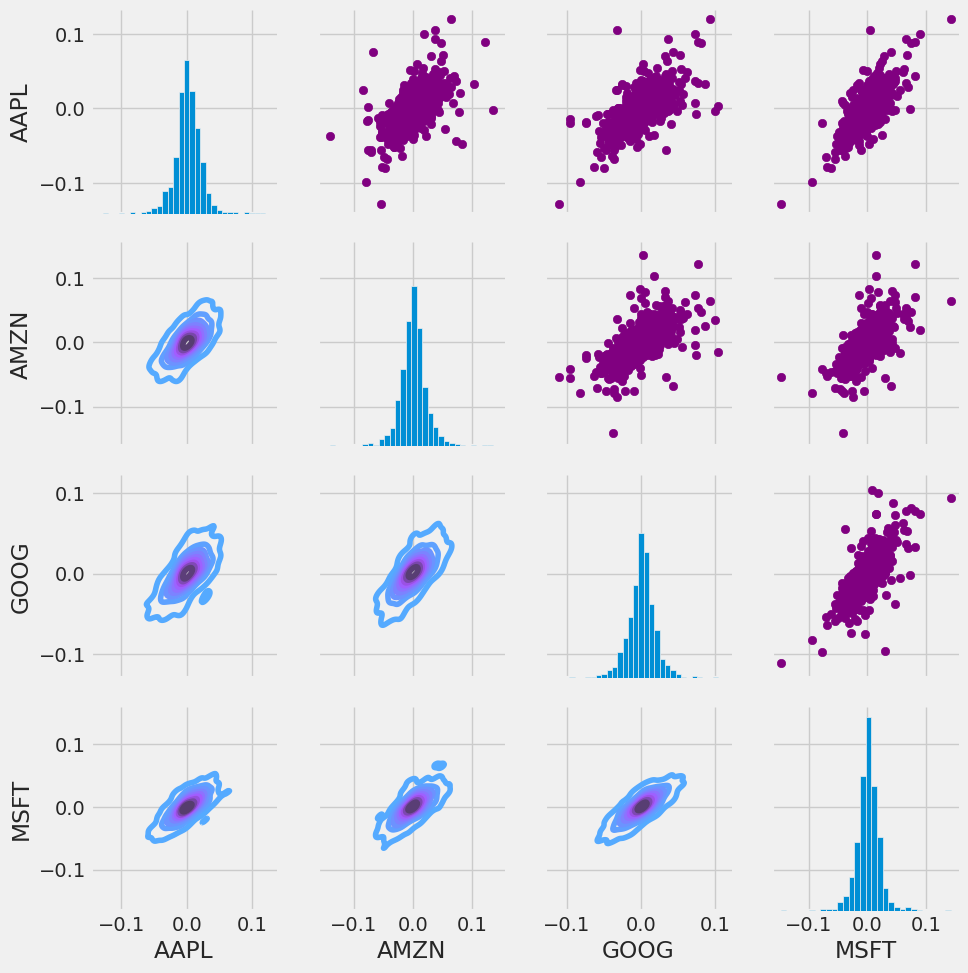

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

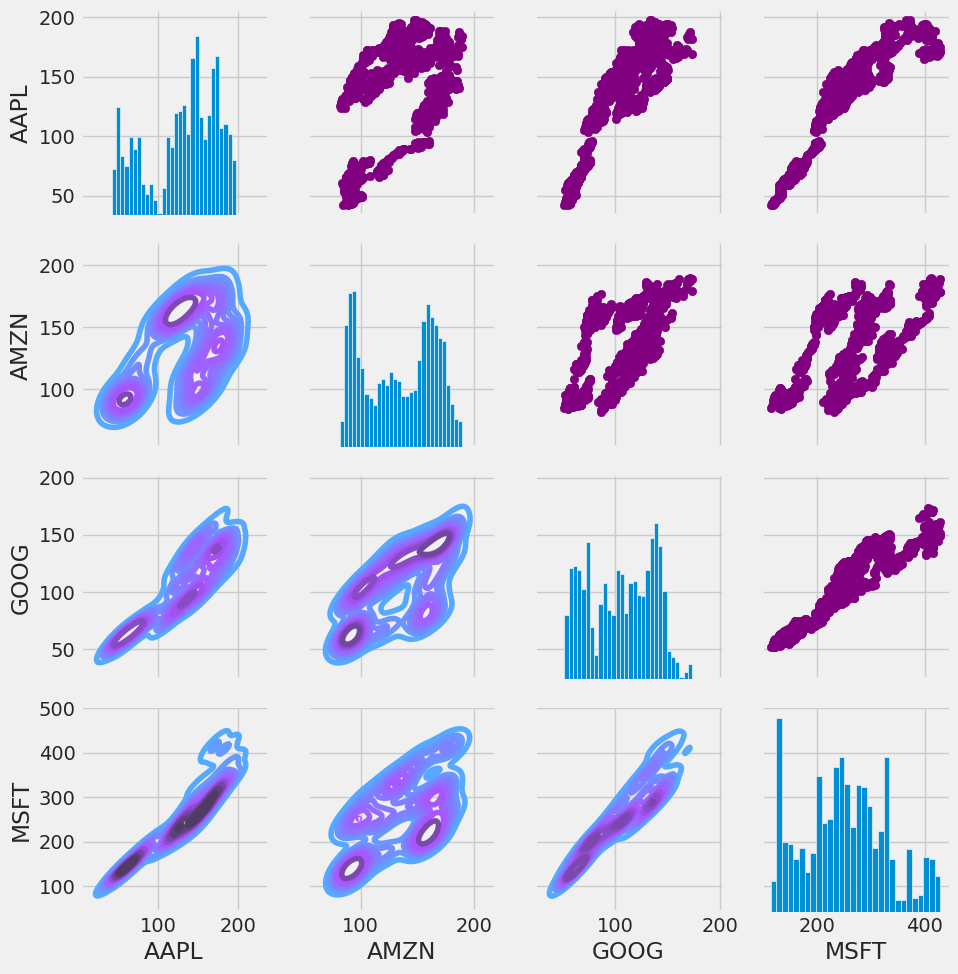

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

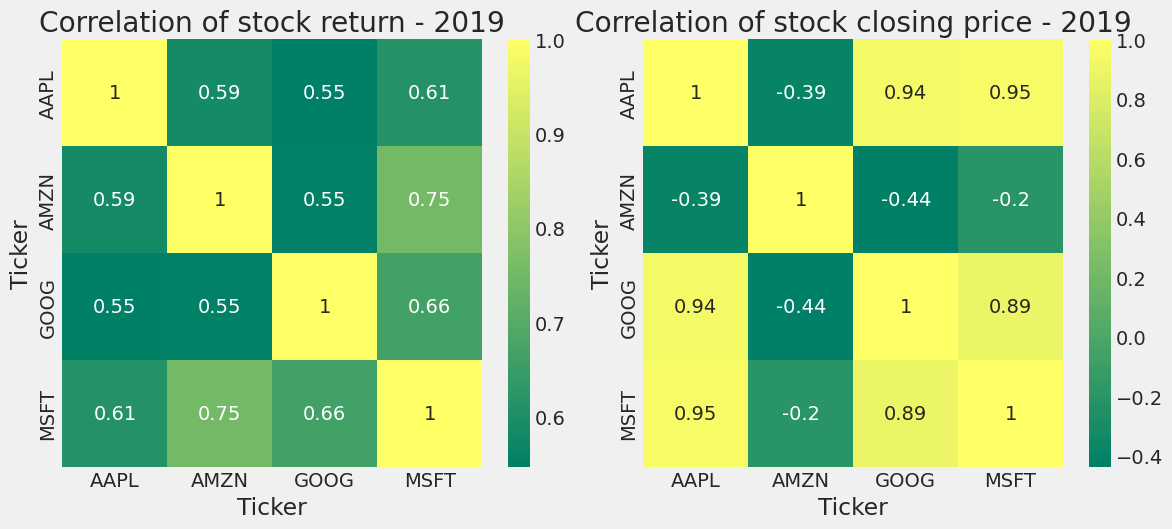

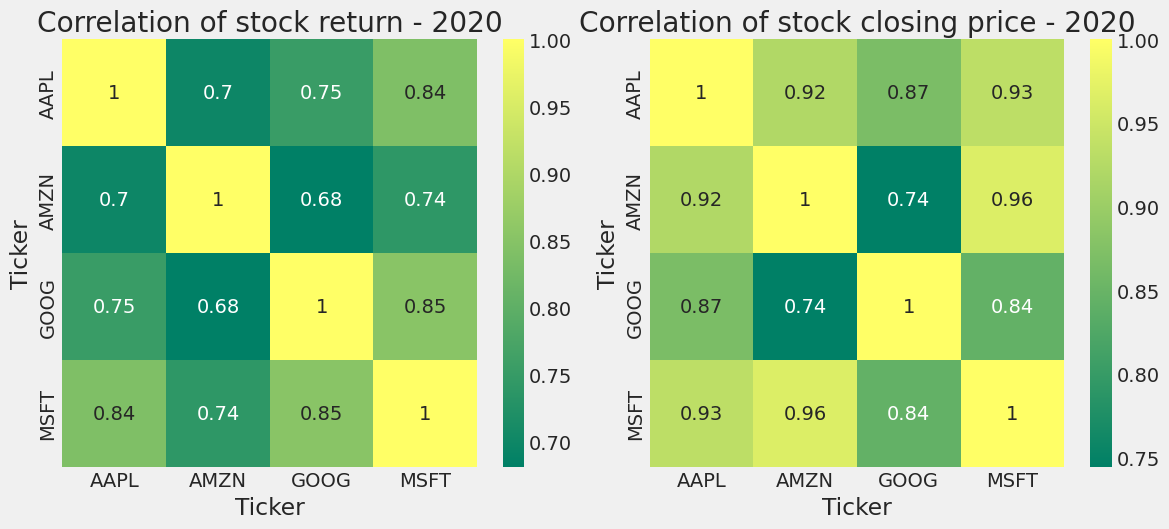

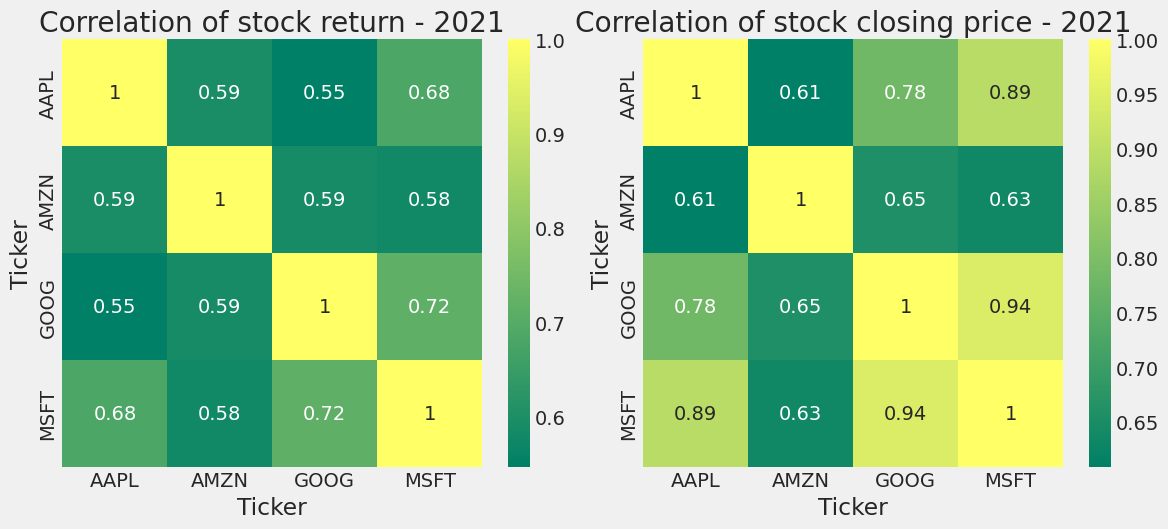

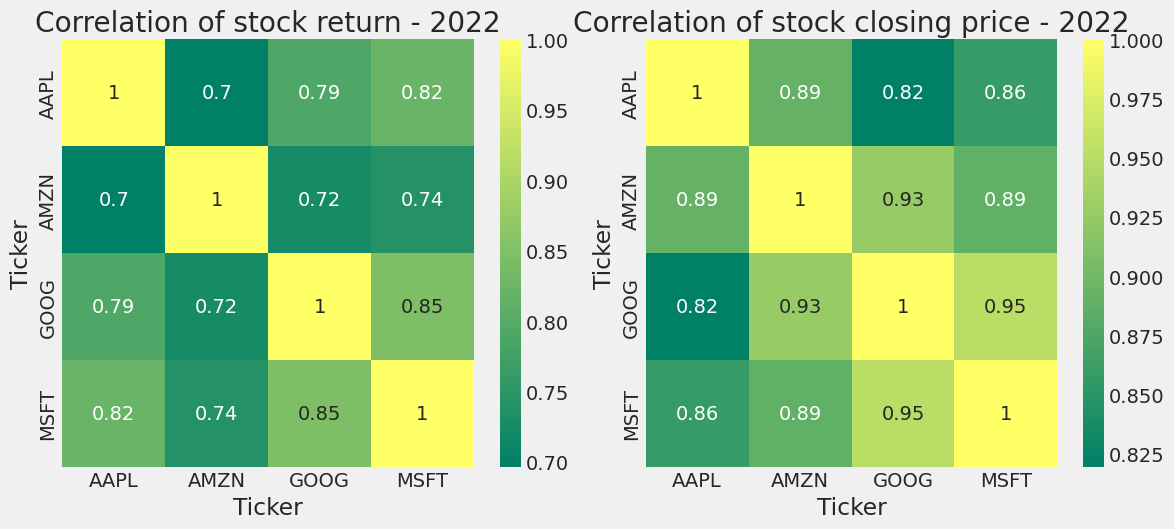

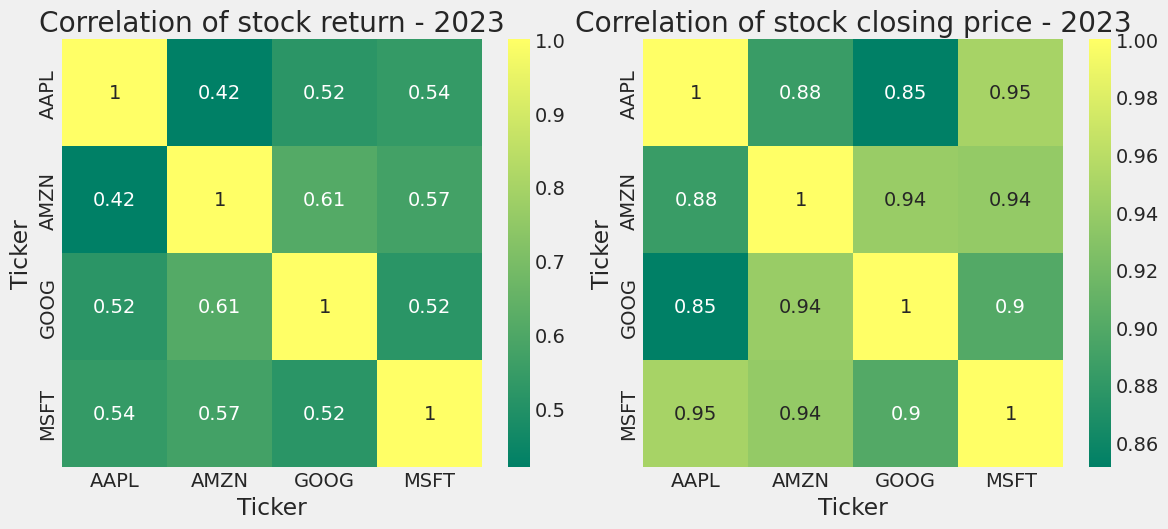

In [ ]:
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt


# Define tech stocks list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']



# Calculate daily returns for tech stocks
tech_rets = closing_df.pct_change()

# Iterate through each year and plot correlation heatmap
years = range(2019, 2024)
for i, year in enumerate(years, 1):
    # Filter data for the current year
    tech_rets_year = tech_rets[tech_rets.index.year == year]
    closing_df_year = closing_df[closing_df.index.year == year]

    # Create a new figure
    plt.figure(figsize=(12, 10))

    # Plot correlation heatmap of stock returns
    plt.subplot(2, 2, 1)
    sns.heatmap(tech_rets_year.corr(), annot=True, cmap='summer')
    plt.title(f'Correlation of stock return - {year}')

    # Plot correlation heatmap of stock closing prices
    plt.subplot(2, 2, 2)
    sns.heatmap(closing_df_year.corr(), annot=True, cmap='summer')
    plt.title(f'Correlation of stock closing price - {year}')

    # Show the plot
    plt.tight_layout()
    plt.show()


Text(0.5, 1.0, 'Correlation of stock closing price')

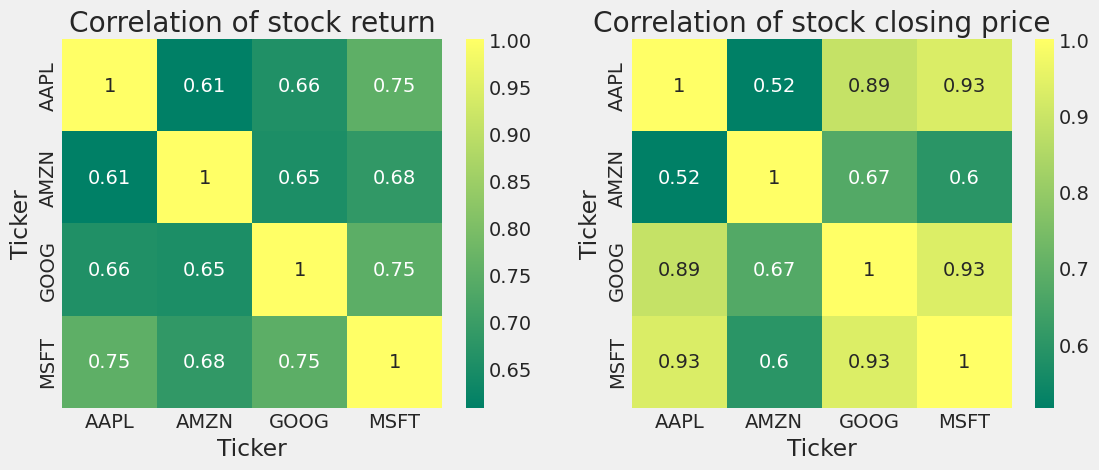

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Text(0.5, 1.0, 'Total Volume of Stock Traded by Company (2019-2023)')

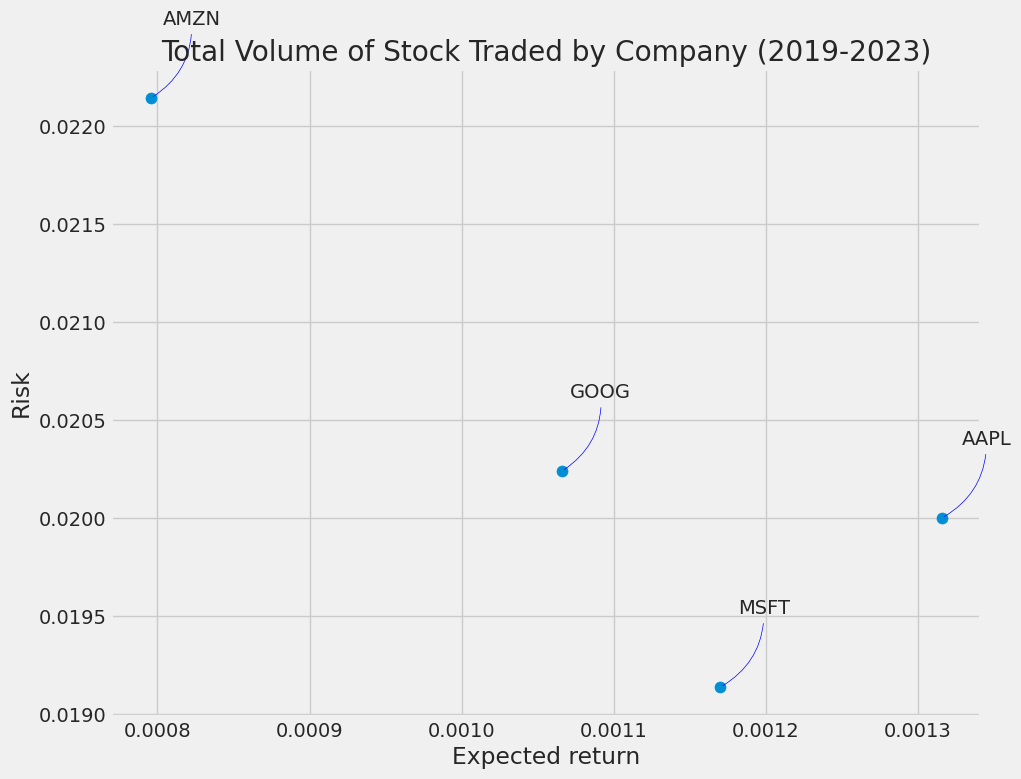

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.title('Total Volume of Stock Traded by Company (2019-2023)')

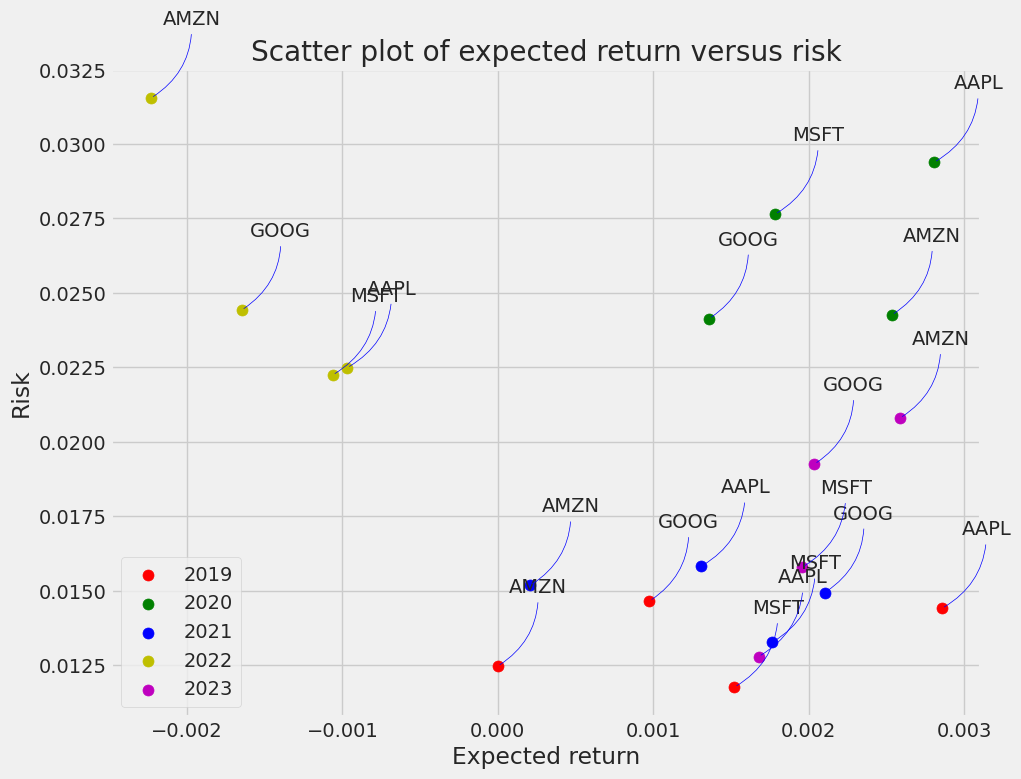

In [ ]:
# Define tech stocks list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Calculate daily returns for tech stocks
tech_rets = closing_df.pct_change()

# Iterate through each year and plot scatter plot for expected return versus risk
years = range(2019, 2024)
colors = ['r', 'g', 'b', 'y', 'm']  # Define colors for each year

plt.figure(figsize=(10, 8))

for year, color in zip(years, colors):
    # Filter data for the current year
    tech_rets_year = tech_rets[tech_rets.index.year == year]

    # Drop rows with NaN values
    rets = tech_rets_year.dropna()

    # Calculate area for scatter plot
    area = np.pi * 20

    # Create scatter plot
    plt.scatter(rets.mean(), rets.std(), s=area, c=color, label=str(year))

    # Add labels for each point
    for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
        plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                     arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Scatter plot of expected return versus risk')
plt.legend()
plt.show()

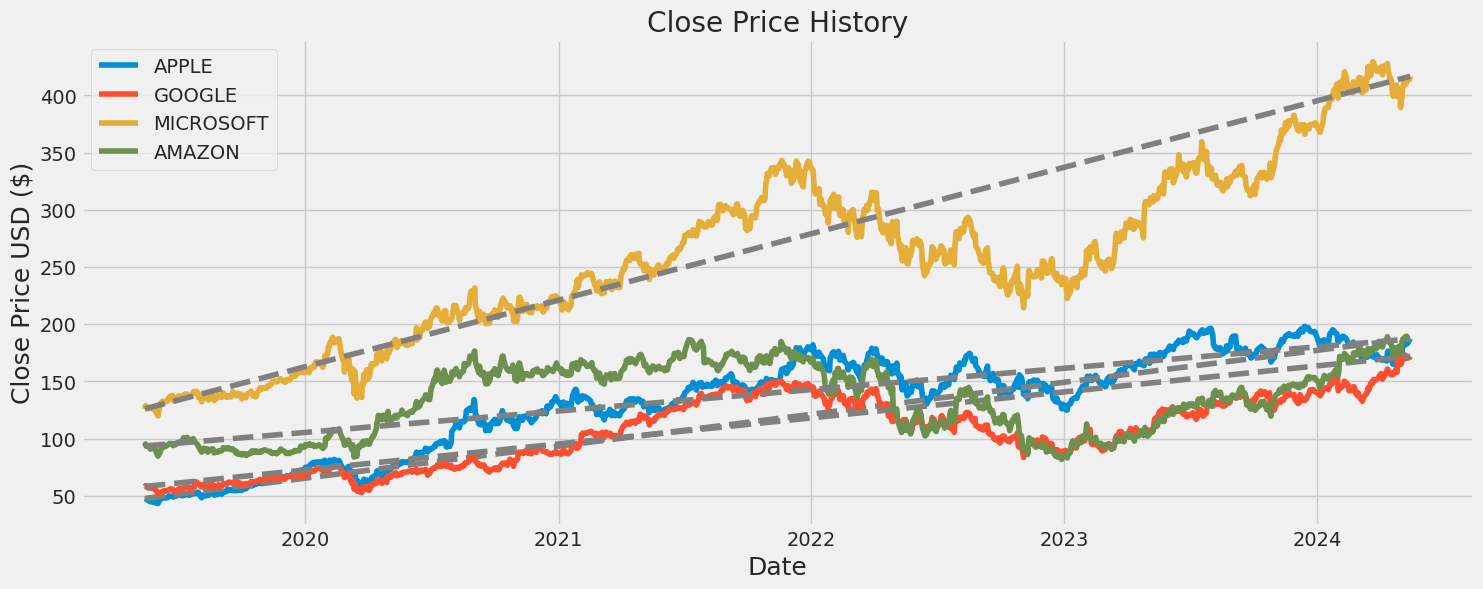

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
for company in company_list:
    plt.plot(company['Close'], label=company['company_name'].iloc[0])
    plt.plot([company.index.min(), company.index.max()], [company['Close'].iloc[0], company['Close'].iloc[-1]], linestyle='--', color='gray')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


In [ ]:
# Filter the original dataframe for dates up to recent time
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))
print(training_data_len)

4785


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Filter the original dataframe for dates up to the end date
filtered_data = df.filter(['Close'])
# Convert the filtered dataframe to a numpy array
dataset = filtered_data.values
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.01141058]
 [0.01086661]
 [0.01016721]
 ...
 [0.37341501]
 [0.3710578 ]
 [0.37235299]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Filter the scaled data for dates up to the end date
train_scaled_data = scaled_data[:training_data_len]

# Create the scaled training data set
x_train = []
y_train = []

# Iterate through the scaled training data to create x_train and y_train
for i in range(60, len(train_scaled_data)):
    x_train.append(train_scaled_data[i-60:i, 0])
    y_train.append(train_scaled_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


4725/4725 [==============================] - 250s 52ms/step - loss: 0.0016


In [ ]:
# Filter the scaled data for dates starting from the end of the training data up to the end date
test_scaled_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

# Iterate through the test scaled data to create x_test
for i in range(60, len(test_scaled_data)):
    x_test.append(test_scaled_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions to get the original price values
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 21ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 4.333337043629221


In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Close  Predictions
Date                               
2023-05-16  113.400002   109.710426
2023-05-17  115.500000   110.604286
2023-05-18  118.150002   112.488739
2023-05-19  116.250000   115.110191
2023-05-22  115.010002   115.524452
...                ...          ...
2024-05-08  188.000000   187.577087
2024-05-09  189.500000   186.789871
2024-05-10  187.479996   186.671082
2024-05-13  186.570007   185.598175
2024-05-14  187.070007   184.367783

[251 rows x 2 columns]

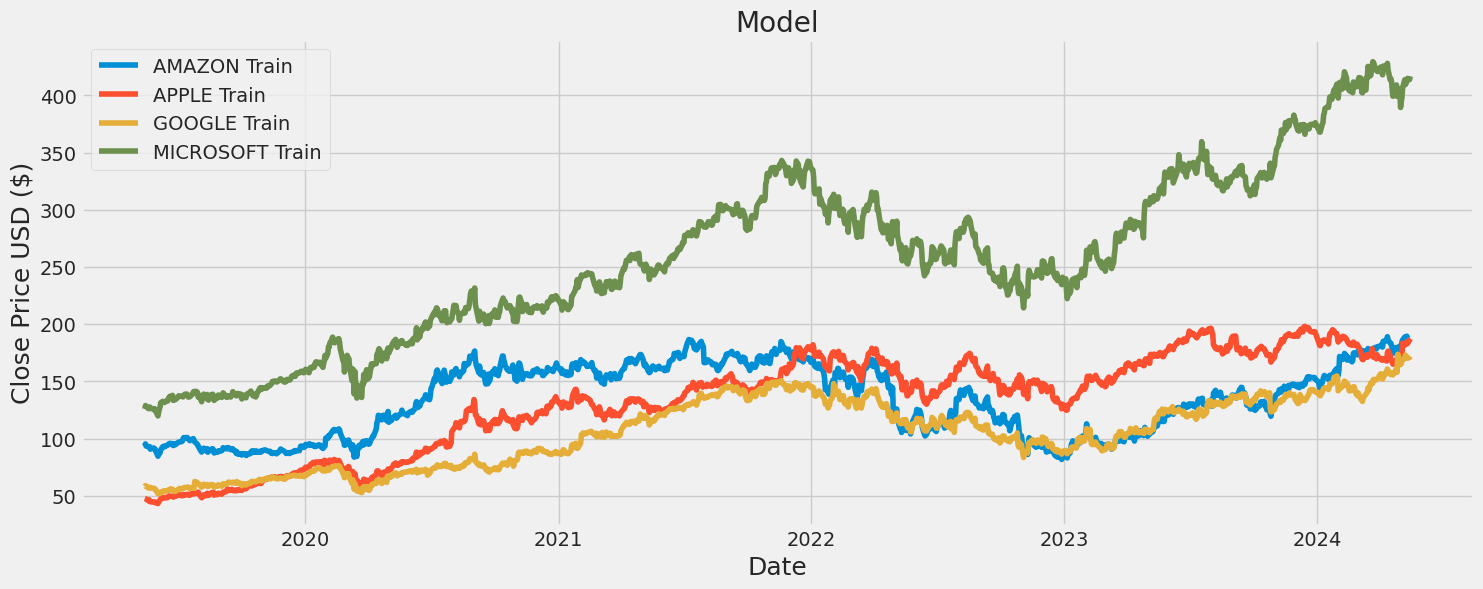

In [ ]:
# Define the train and validation data for each company
train_data = {}
valid_data = {}
valid_data['Predictions'] = {}

for company_name, company_data in company_subsets.items():
    train_data[company_name] = company_data[:training_data_len]
    valid_data[company_name] = company_data[training_data_len:]

# Plot the data for all four companies
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot training data for all four companies
for company_name, train_company_data in train_data.items():
    plt.plot(train_company_data['Close'], label=f'{company_name} Train')




plt.legend(loc='upper left')
plt.show()


In [ ]:
# Assuming 'model' is your trained LSTM model and 'scaler' is the MinMaxScaler used for scaling the data

# Load your test dataset or prepare the input data for prediction

# Filter the scaled data for dates starting from the end of the training data up to the end date
test_scaled_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test
x_test = []

# Iterate through the test scaled data to create x_test
for i in range(60, len(test_scaled_data)):
    x_test.append(test_scaled_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions to get the original price values
predictions = scaler.inverse_transform(predictions)

# Now you have the predicted values for the future dates
print(predictions)


8/8 [==============================] - 2s 63ms/step
[[110.046326]
 [110.793175]
 [112.14294 ]
 [114.12557 ]
 [115.10374 ]
 [114.95934 ]
 [114.44497 ]
 [114.57045 ]
 [114.42744 ]
 [115.846985]
 [117.90917 ]
 [119.153786]
 [120.288246]
 [121.445404]
 [122.55096 ]
 [123.68409 ]
 [122.78134 ]
 [122.36119 ]
 [122.104645]
 [123.04005 ]
 [124.18733 ]
 [124.93504 ]
 [125.46111 ]
 [125.20336 ]
 [124.82213 ]
 [124.25788 ]
 [125.51571 ]
 [126.83161 ]
 [127.0607  ]
 [127.335785]
 [127.49967 ]
 [127.21901 ]
 [127.651505]
 [128.20056 ]
 [128.66096 ]
 [128.2917  ]
 [128.1715  ]
 [127.38334 ]
 [127.13811 ]
 [127.85347 ]
 [129.80482 ]
 [131.66063 ]
 [132.42583 ]
 [132.22714 ]
 [132.52487 ]
 [131.26036 ]
 [129.87082 ]
 [128.60828 ]
 [127.99548 ]
 [127.575645]
 [127.40301 ]
 [128.60686 ]
 [130.3627  ]
 [131.0321  ]
 [129.8787  ]
 [128.61261 ]
 [131.14311 ]
 [135.1827  ]
 [137.6377  ]
 [137.86584 ]
 [137.34453 ]
 [136.72713 ]
 [137.06375 ]
 [136.82617 ]
 [135.66673 ]
 [134.24356 ]
 [133.01755 ]
 [132.7894

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset and 'company_column' is the column containing company names

# List of unique company names
unique_companies = df['company_name'].unique()

# Dictionary to store subsets for each company
company_subsets = {}

# Create subsets for each company
for company in unique_companies:
    subset = df[df['company_name'] == company].copy()  # Filter rows for current company
    company_subsets[company] = subset

# Now 'company_subsets' is a dictionary where each key is a company name and each value is a DataFrame containing the subset of data for that company
print(company_subsets)

{'APPLE':                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-05-15   46.567501   47.937500   46.505001   47.730000   46.064091   
2019-05-16   47.477501   48.117500   47.209999   47.520000   45.861412   
2019-05-17   46.732498   47.724998   46.689999   47.250000   45.600845   
2019-05-20   45.880001   46.087502   45.070000   45.772499   44.174908   
2019-05-21   46.305000   47.000000   46.174999   46.650002   45.021790   
...                ...         ...         ...         ...         ...   
2024-05-08  182.850006  183.070007  181.449997  182.740005  182.492477   
2024-05-09  182.559998  184.660004  182.110001  184.570007  184.320007   
2024-05-10  184.899994  185.089996  182.130005  183.050003  183.050003   
2024-05-13  185.440002  187.100006  184.619995  186.279999  186.279999   
2024-05-14  187.509995  188.300003  186.289993  187.429993  187.429993   

               Volume compa

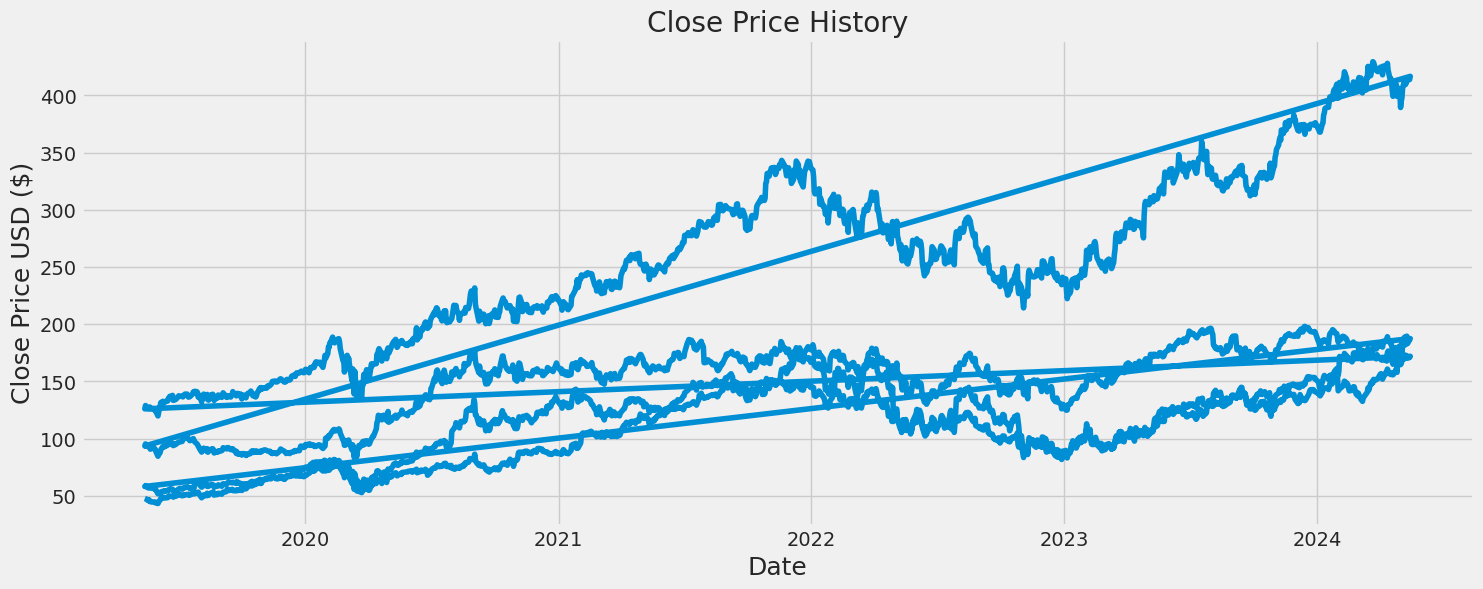

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
# Data Preparation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Sequence Creation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Length of input sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and validation sets (e.g., 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(units=50, activation='relu'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Prediction
predicted_prices = model.predict(X_val)

# Inverse scaling to get the actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
y_val_actual = scaler.inverse_transform(y_val)

# Print the actual and predicted prices for each company separately with dates
for company_name, subset_data in company_subsets.items():
    # Filter the validation data for the specific company using the index of the original DataFrame
    company_val_data = subset_data.iloc[:len(y_val_actual)]

    # Get the corresponding actual and predicted prices for the company
    company_actual_prices = y_val_actual[:, 0]  # Assuming 'Close' is the column containing prices
    company_predicted_prices = predicted_prices[:, 0]  # Predicted prices for the company
    # Print the actual and predicted prices for the company with dates
    for i in range(len(company_actual_prices)):
        print(f"Company: {company_name}, Date: {company_val_data.index[i]}, Actual Price: {company_actual_prices[i]}, Predicted Price: {company_predicted_prices[i]}")

Epoch 1/10
125/125 [==============================] - 8s 44ms/step - loss: 0.0115 - val_loss: 8.2074e-04
Epoch 2/10
125/125 [==============================] - 7s 58ms/step - loss: 0.0011 - val_loss: 5.4445e-04
Epoch 3/10
125/125 [==============================] - 5s 41ms/step - loss: 9.9699e-04 - val_loss: 5.2978e-04
Epoch 4/10
125/125 [==============================] - 5s 43ms/step - loss: 8.5988e-04 - val_loss: 5.0176e-04
Epoch 5/10
125/125 [==============================] - 7s 57ms/step - loss: 7.6001e-04 - val_loss: 7.2365e-04
Epoch 6/10
125/125 [==============================] - 5s 42ms/step - loss: 7.1240e-04 - val_loss: 4.3080e-04
Epoch 7/10
125/125 [==============================] - 8s 61ms/step - loss: 6.7308e-04 - val_loss: 4.3432e-04
Epoch 8/10
125/125 [==============================] - 5s 41ms/step - loss: 5.8512e-04 - val_loss: 3.7912e-04
Epoch 9/10
125/125 [==============================] - 5s 44ms/step - loss: 5.9299e-04 - val_loss: 3.7206e-04
Epoch 10/10
32/32 [========

In [ ]:
# Get the length of validation data for each company
for company_name, subset_data in company_subsets.items():
    company_val_data = subset_data.iloc[:len(y_val_actual)]
    print(f"Company: {company_name}, Length of Validation Data: {len(company_val_data)}")

Company: APPLE, Length of Validation Data: 998
Company: GOOGLE, Length of Validation Data: 998
Company: MICROSOFT, Length of Validation Data: 998
Company: AMAZON, Length of Validation Data: 998


In [ ]:
pip install tkcalendar

In [ ]:

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from tkcalendar import Calendar

# Function to skip weekends
def skip_weekends(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    while date.weekday() >= 5:  # Check if it's Saturday or Sunday
        date += timedelta(days=1)  # Move to the next day
    return date.strftime('%Y-%m-%d')

# Prompt the user to input a date
print("Enter a date (YYYY-MM-DD):")
input_date = input()

# Adjust the input date to skip weekends
adjusted_date = skip_weekends(input_date)
if adjusted_date != input_date:
    print(f"The market is closed on weekends. Adjusted date: {adjusted_date}")
else:
    print("The entered date is a weekday.")

# Proceed with stock market prediction using the adjusted date

# Prepare the Data and Predict Future Price for each Company
for company_name, subset_data in company_subsets.items():
    # Prepare the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(subset_data['Close'].values.reshape(-1, 1))

    # Get historical data leading up to the specific future date
    historical_data = scaled_data[subset_data.index <= adjusted_date][-seq_length:]

    # Reshape the input sequence for prediction
    X_future = np.array(historical_data).reshape(1, seq_length, 1)

    # Predict Future Price
    predicted_price_scaled = model.predict(X_future)  # Assuming model is defined outside the loop
                                                      # and trained on data from all companies

    # Inverse scaling to get the actual predicted price
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    print("Predicted price for", company_name, "on", adjusted_date, ":", predicted_price[0][0])


Enter a date (YYYY-MM-DD):
2024-05-19
The market is closed on weekends. Adjusted date: 2024-05-20
1/1 [==============================] - 0s 31ms/step
Predicted price for APPLE on 2024-05-20 : 183.0234
1/1 [==============================] - 0s 31ms/step
Predicted price for GOOGLE on 2024-05-20 : 169.04932
1/1 [==============================] - 0s 31ms/step
Predicted price for MICROSOFT on 2024-05-20 : 409.397
1/1 [==============================] - 0s 32ms/step
Predicted price for AMAZON on 2024-05-20 : 184.94096
